# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo, entre os parâmetros de idade do veículo quando a propaganda foi colocada, quilometragem, número de cilindros, condição e cor do veículo. Analisando pela lógica, idade e quilometragem serão inversamente proporcionais ao preço, enquanto a condição será proporcional ao preço. Vamos conferir essas hipóteses e analisar também os outros parâmetros.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
dados = pd.read_csv('/datasets/vehicles_us.csv')


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprima uma amostragem dos dados
dados.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


A coluna 'model_year deveria ser fo tipo int e 'date_posted' deveriam ser do tipo datetime. 

As colunas 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd' possuem valores ausentes. Essas colunas não possuem as mesmas quantidades de valores ausentes, então talvez não tem relação uma com a outra sobre ter valores ausentes.

In [5]:
#Vendo informações principais
dados.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
#Vendo informações principais - Para dados categóricos
dados.describe(include='O')

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [7]:
#Verificando se há valores duplicados explícitos
dados.duplicated().sum()

0

Em relação ao tipo de dados, aparentemente todas as colunas estão corretas, exceto as colunas 'model_year', que deve ser do tipo int, e 'date_posted', que deve ser do tipo datetime.

Existem 5 colunas com valores ausentes ('model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'), e possuem quantidades diferentes de valores faltantes, portanto talvez não tenha um motivo para elas estarem ausentes, e sim ser aleatoriamente.

Não há valores duplicados. 

## Cuide dos valores ausentes (se houver algum)

In [8]:
#Contando os valores ausentes das colunas
dados.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [9]:
#Verificando os valores da coluna is_4wd
dados['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

50% dos dados da coluna 'is_4wd' são ausentes, portanto não é recomendado excluí-los. Vou preenchê-la com o valor zero, pois esta é uma coluna binária.

In [10]:
dados['is_4wd'] = dados['is_4wd'].fillna(0)

In [11]:
#Verificando se os valores ausentes da coluna is_4wd foram substituídos
dados.isna().sum().sort_values(ascending=False)

paint_color     9267
odometer        7892
cylinders       5260
model_year      3619
price              0
model              0
condition          0
fuel               0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [12]:
dados['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

A coluna 'paint_color' possui valores categóricos, portanto não tem como preenchê-la com a média ou mediana; vamos preenchê-la com o valor "desconhecido".

In [13]:
dados['paint_color'] = dados['paint_color'].fillna('unknown')

In [14]:
#Verificando se os valores ausentes da coluna paint_color foram substituídos
dados.isna().sum().sort_values(ascending=False)

odometer        7892
cylinders       5260
model_year      3619
price              0
model              0
condition          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [15]:
dados.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,0.496303,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


Pela tabela acima, vemos que a média e a mediana da coluna 'odometer' são valores próximos, preencherei com a mediana.

In [19]:
df_med = dados.groupby(['condition']).agg({'odometer': 'median'})
dados['odometer'].fillna(dados.groupby(['condition'])['odometer'].transform('median'), inplace=True)

In [20]:
#Verificando se os valores ausentes da coluna odometer foram substituídos
dados.isna().sum().sort_values(ascending=False)

cylinders       5260
model_year      3619
price              0
model              0
condition          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Pela tabela describe vemos que a média e mediana da coluna 'cylinders' são valores muito próximos, portanto acredito que não fará diferença um ou outro. Mas como se trata de uma variável categórica, vou preenchê-la com a moda.

In [21]:
def mode_columns(DF):
    return DF.mode()[0]

df_mode = dados.groupby(['model']).agg({'cylinders': mode_columns})

dados['cylinders'].fillna(dados.groupby(['model'])['cylinders'].transform(mode_columns), inplace=True)

In [22]:
#Verificando se os valores ausentes da coluna cylinders foram substituídos
dados.isna().sum().sort_values(ascending=False)

model_year      3619
price              0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Pela tabela describe vemos que a média e mediana da coluna 'model_year' são valores muito próximos, portanto acredito que não fará diferença um ou outro. Mas como se trata de uma variável categórica, preencherei com a moda.

In [23]:
def mode_columns(DF):
    return DF.mode()[0]

df_mode = dados.groupby(['model']).agg({'model_year': mode_columns})

dados['model_year'].fillna(dados.groupby(['model'])['model_year'].transform(mode_columns), inplace=True)

In [24]:
#Verificando se os valores ausentes da coluna model_year foram substituídos
dados.isna().sum().sort_values(ascending=False)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corrija os tipos de dados

In [25]:
dados['model_year'] = dados['model_year'].astype(int)
dados['date_posted'] = pd.to_datetime(dados['date_posted'], format='%Y-%m-%d')

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


In [27]:
dados.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


## Enriqueça os dados

In [28]:
# Adicione valores data/hora para quando a propaganda estiver colocada

# Data de quando a propaganda foi colocada já não é a coluna 'date_posted' ????
dados['day_posted'] = dados['date_posted'].dt.day
dados['weekday_posted'] = dados['date_posted'].dt.dayofweek
dados['month_posted'] = dados['date_posted'].dt.month
dados['year_posted'] = dados['date_posted'].dt.year
dados.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,5,6,2018
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,1,4,2019


In [29]:
# Adicione a idade do veículo quando a propaganda for colocada
dados['age'] = dados['year_posted'] - dados['model_year'] + 1
dados.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,weekday_posted,month_posted,year_posted,age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,5,6,2018,7
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,4,10,2018,5
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,3,2,2019,6
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,1,4,2019,2


In [30]:
# Adicione a quilometragem média por ano

dados['km_year'] = (dados['odometer'] / dados['age']).round(0)
dados.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,weekday_posted,month_posted,year_posted,age,km_year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,5,6,2018,7,20714.0
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,4,10,2018,5,17741.0
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,3,2,2019,6,18333.0
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,4,3,2019,16,11351.0
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,1,4,2019,2,40452.0


In [ ]:
#dados['age'] = dados['year_posted'] - dados['model_year']

In [31]:
dados['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [32]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
dados.loc[dados['condition'] == 'new', 'condition'] = 5
dados.loc[dados['condition'] == 'like new', 'condition'] = 4
dados.loc[dados['condition'] == 'excellent', 'condition'] = 3
dados.loc[dados['condition'] == 'good', 'condition'] = 2
dados.loc[dados['condition'] == 'fair', 'condition'] = 1
dados.loc[dados['condition'] == 'salvage', 'condition'] = 0

In [33]:
dados['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Como mudamos a coluna para valores numéricos, vou mudar o tipo da coluna de 'object' para 'int'.

In [34]:
dados['condition'] = dados['condition'].astype(int)

## Verifique os dados limpos

In [35]:
# imprima as informações gerais/resumidas sobre o DataFrame

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  float64       
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  day_posted      51525 non-null  int64         
 14  weekday_posted  51525 non-null  int64         
 15  mo

In [36]:
# imprima uma amostragem dos dados

dados.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,weekday_posted,month_posted,year_posted,age,km_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,5,6,2018,7,20714.0
1,25500,2013,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,4,10,2018,5,17741.0
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,22,4,3,2019,16,11351.0
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,1,4,2019,2,40452.0
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,20,2,6,2018,4,14488.0
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,27,3,12,2018,3,26404.0
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7,0,1,2019,6,18246.0
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,16,0,7,2018,6,17362.0
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,15,4,2,2019,11,13381.0


## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

<AxesSubplot:ylabel='Frequency'>

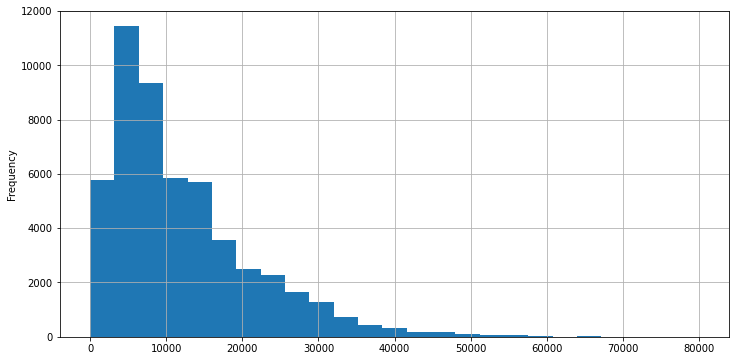

In [37]:
dados['price'].plot(kind='hist', bins=25, grid=True, range=(0, 80000), figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

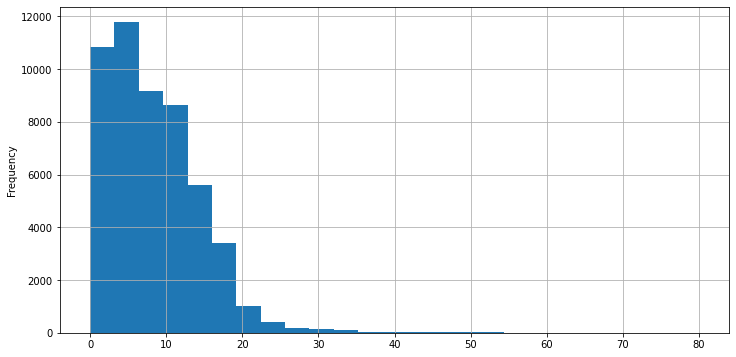

In [38]:
dados['age'].plot(kind='hist', grid=True, bins=25, range=(0, 80), figsize=(12, 6))

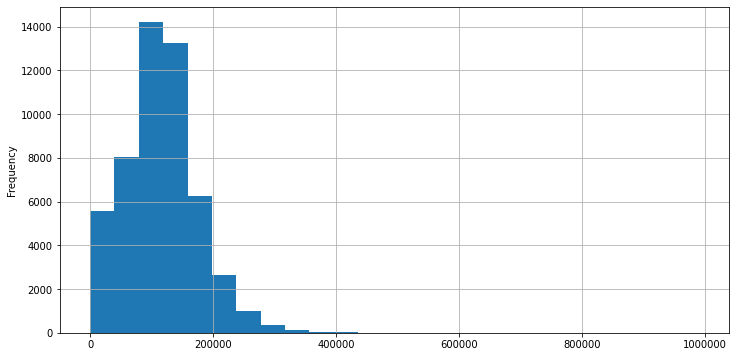

In [39]:
dados['odometer'].plot(kind='hist', grid=True, bins=25, figsize=(12, 6)).ticklabel_format(style='plain', axis='x')

<AxesSubplot:ylabel='Frequency'>

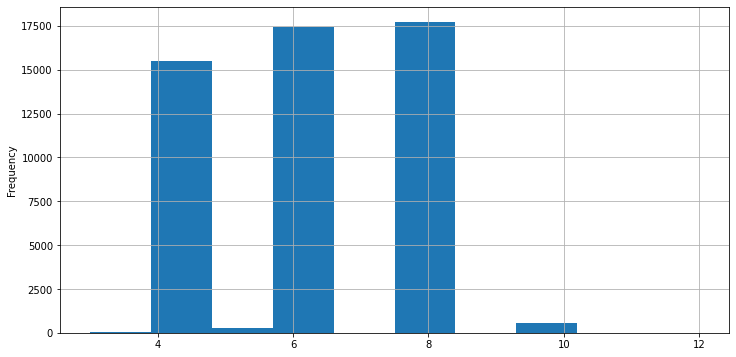

In [40]:
dados['cylinders'].plot(kind='hist', grid=True, figsize=(12, 6)) 

<AxesSubplot:ylabel='Frequency'>

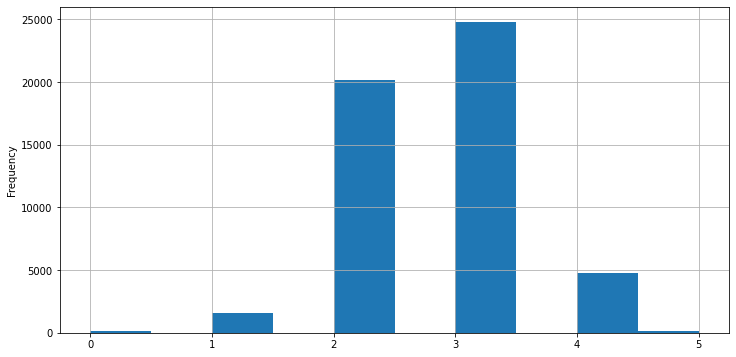

In [41]:
dados['condition'].plot(kind='hist', grid=True, figsize=(12, 6))

## Estude e cuide dos valores ausentes

As colunas que provavelmente contêm valores atípicos são as colunas 'price', 'age' e 'odometer'. A coluna 'cylinders' não possui valores atípicos, são valores que basicamente vão de 2 em 2 (de 3 a 12); e a coluna 'condition' é categórica e também não possui valores atípicos.


In [42]:
#price
q1_price = dados['price'].quantile(0.25)
q3_price = dados['price'].quantile(0.75)
iqr_price = q3_price - q1_price

#age
q1_age = dados['age'].quantile(0.25)
q3_age = dados['age'].quantile(0.75)
iqr_age = q3_age - q1_age

#odometer
q1_odometer = dados['odometer'].quantile(0.25)
q3_odometer = dados['odometer'].quantile(0.75)
iqr_odometer = q3_odometer - q1_odometer

In [43]:
# Determine o limite inferior para valores atípicos
lim_inf_price = q1_price - 1.5 * iqr_price
print(lim_inf_price)
print()
lim_inf_age = q1_age - 1.5 * iqr_age
print(lim_inf_age)
print()
lim_inf_odometer = q1_odometer - 1.5 * iqr_odometer
print(lim_inf_odometer)

-12758.5

-8.0

-32561.5


Não existe preço, nem idade, nem km negativos, portanto o limite inferior será 0, que não é preciso especificar no novo DataFrame pois não ecistem nas colunas valores menores que 0.

In [44]:
# Determine o limite superior para valores atípicos
lim_sup_price = q3_price + 1.5 * iqr_price
print(lim_sup_price)
print()
lim_sup_age = q3_age + 1.5 * iqr_age
print(lim_sup_age)
print()
lim_sup_odometer = q3_odometer + 1.5 * iqr_odometer
print(lim_sup_odometer)

34597.5

24.0

256050.5


## Estude os parâmetros fundamentais sem valores atípicos

In [45]:
df_price = dados.loc[dados['price'] < lim_sup_price]
df_age = dados.loc[dados['age'] < lim_sup_age]
df_odometer = dados.loc[dados['odometer'] < lim_sup_odometer]

<AxesSubplot:ylabel='Frequency'>

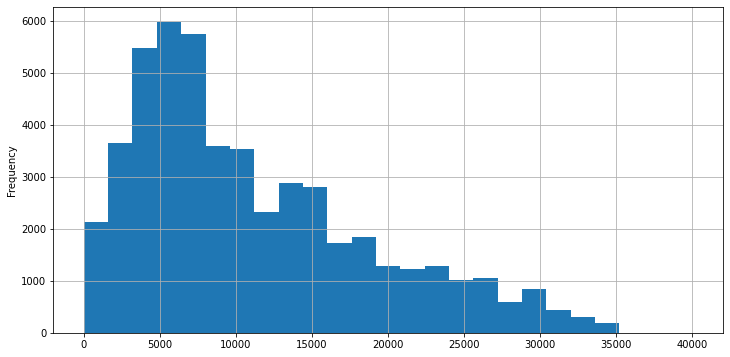

In [46]:
df_price['price'].plot(kind='hist', bins=25, grid=True,range=(0, 40000), figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

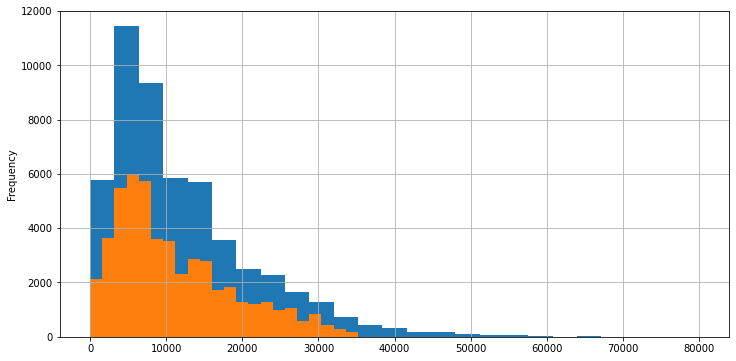

In [47]:
dados['price'].plot(kind='hist', bins=25, grid=True, range=(0, 80000), figsize=(12, 6))
df_price['price'].plot(kind='hist', bins=25, grid=True, range=(0, 40000), figsize=(12, 6))

Os gráficos aparentemente são proprocionais, tendo picos praticamente nos mesmos pontos. O que mais diferencia um do outro são os valores atípicos. 

<AxesSubplot:ylabel='Frequency'>

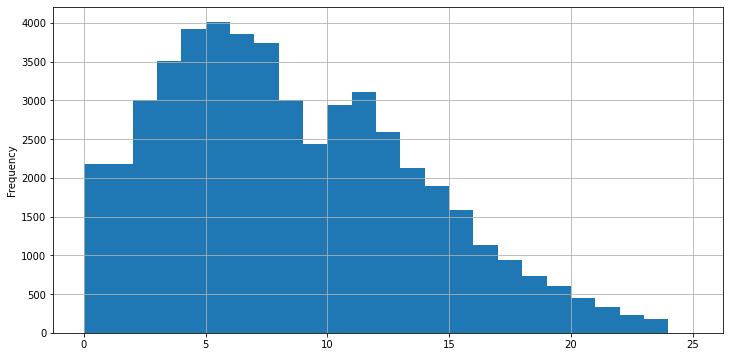

In [48]:
df_age['age'].plot(kind='hist', grid=True, bins=25, range=(0, 25), figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

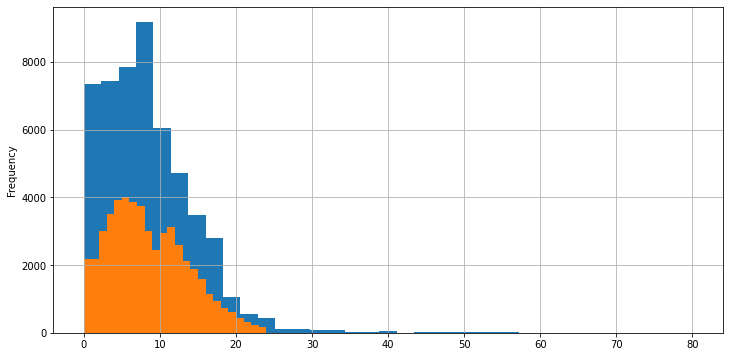

In [49]:
dados['age'].plot(kind='hist', grid=True, bins=35, range=(0, 80), figsize=(12, 6))
df_age['age'].plot(kind='hist', grid=True, bins=25, range=(0, 25), figsize=(12, 6))

Os gráficos aparentemente são proprocionais, tendo picos praticamente nos mesmos pontos; mas o laranja tem mais mudanças entre o 0 e 10 que o azul. O que mais diferencia um do outro são os valores atípicos.

<AxesSubplot:ylabel='Frequency'>

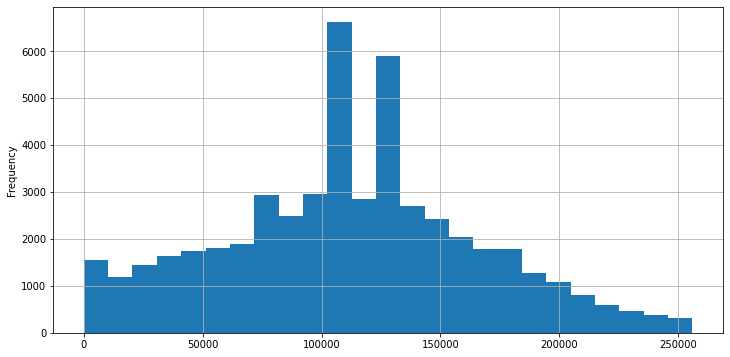

In [50]:
df_odometer['odometer'].plot(kind='hist', grid=True, bins=25, figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

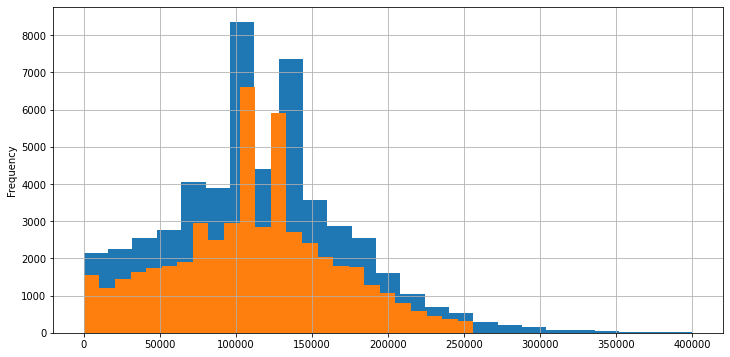

In [51]:
dados['odometer'].plot(kind='hist', grid=True, bins=25, figsize=(12, 6), range=(0, 400000)).ticklabel_format(style='plain', axis='x')
df_odometer['odometer'].plot(kind='hist', grid=True, bins=25, figsize=(12, 6))

Os gráficos aparentemente são proprocionais, tendo picos praticamente nos mesmos pontos. O que mais diferencia um do outro são os valores atípicos.

<AxesSubplot:ylabel='Frequency'>

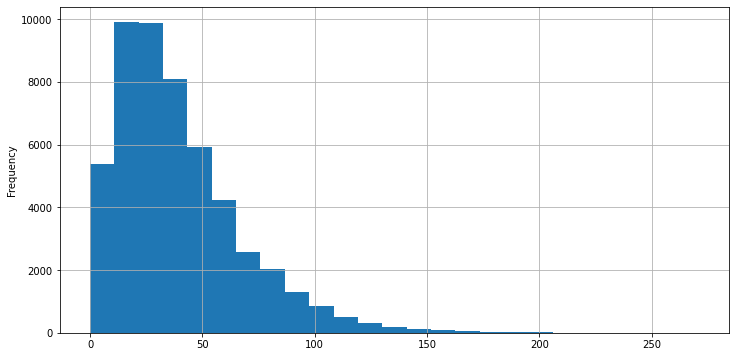

In [52]:
dados['days_listed'].plot(kind='hist', grid=True, figsize=(12,6), bins=25)

In [53]:
dados['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Podemos observar a que média é maior que a mediana, acredito que os valores atípicos que vemos no gráfico (a partir de 120 começam pequenas quantidades de altos valores) faz a média aumentar. 

In [54]:
q1_days = dados['days_listed'].quantile(0.25)
q3_days = dados['days_listed'].quantile(0.75)
iqr_days = q3_days - q1_days

lim_inf_days = q1_days - 1.5 * iqr_days
lim_sup_days = q3_days + 1.5 * iqr_days
print(lim_inf_days, lim_sup_days)

-32.0 104.0


Não existem dias negativos, então podemos considerar o limite inferior igual a 0. 

Como há valores atípicos significativos, vou considerar a mediana como o tempo de vida útil comum de uma propaganda, 33 dias.

Considerarei propagandas removidas rapidamente aquelas inferiores ao q1, ou seja, inferiores a 19 dias.

Vou considerar as propagandas listadas por um tempo anormalmente longo, o valor do limite superior, tempos superiores a 104 dias.

## Média de preços por cada tipo de veículo

In [55]:
df_type = dados.groupby('type').agg({'model': 'count','price': 'mean'})\
                    .rename(columns={'type': 'type', 'model': 'count','price': 'avg_price'})\
                    .sort_values(by='count', ascending=False).reset_index()
print(df_type)

           type  count     avg_price
0           SUV  12405  11149.400000
1         truck  12353  16734.894924
2         sedan  12154   6965.358647
3        pickup   6988  16057.410418
4         coupe   2303  14353.442901
5         wagon   1541   9088.134328
6      mini-van   1161   8193.177433
7     hatchback   1047   6868.513849
8           van    633  10546.941548
9   convertible    446  14575.881166
10        other    256  10989.714844
11      offroad    214  14292.294393
12          bus     24  17135.666667


* 'truck' fica em 2º lugar tanto em quantidade quanto em preço médio.
* 'pickup' fica em 4° lugar em relação a quantidade e em 3º lugar em relação a preço médio.
* 'coupe' fica em 5° lugar tanto em quantidade quanto em preço médio.
* 'van' fica em 9° lugar tanto em quantidade quanto em preço médio.
* 'bus' em relação a quantidade fica um último lugar, mas em relação a preço médio fica em primeiro lugar.

<AxesSubplot:ylabel='type'>

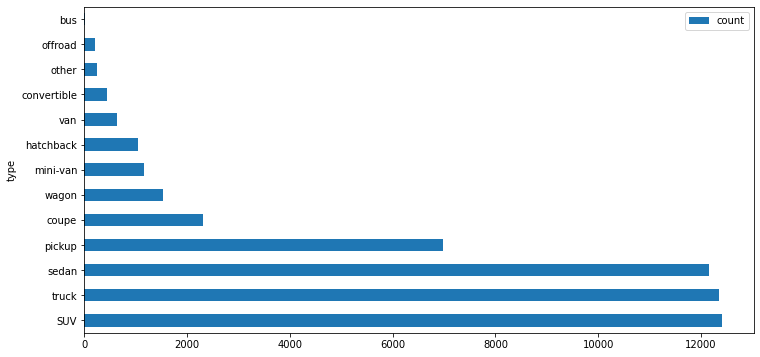

In [56]:
df_type.plot.barh(y='count', x='type', figsize=(12,6))

**Os dois tipos de veículos com maiores números de propagandas são: SUV e truck**

## Fatores de preço

Farei o calculado de correlação para as colunas que são do tipo int e float comparado ao preço; o calculo não funciona com as colunas do tipo object.

Tipos mais populares: SUV, truck, sedan e pickup.

<AxesSubplot:xlabel='age', ylabel='price'>

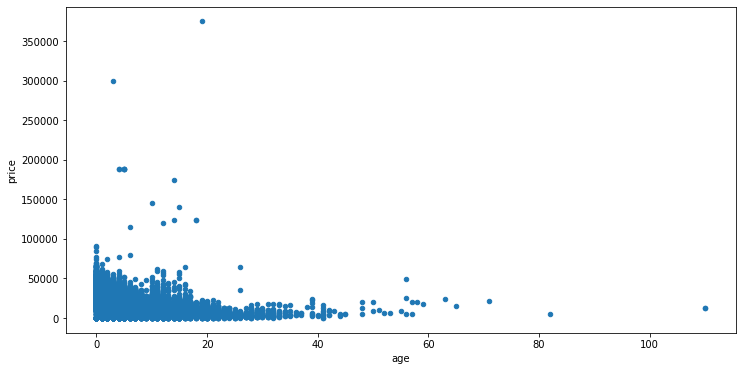

In [57]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].plot.scatter(x='age', y='price', figsize=(12,6))

Como vemos no gráfico, quanto menor a idade do veículo, mais alto será seu preço. Porém, ocorre alguns picos de preço na faixa dos 10 anos; também dos 30 anos a 40 há um pequeno aumento; e há preços maiores também na faixa dos 60 anos (talvez relíquias).

In [58]:
dados['price'].corr(dados['age'])

-0.4085789213787886

Há uma correlação negativa (quanto menor a idade, maior o preço) e não é uma correlação tão forte

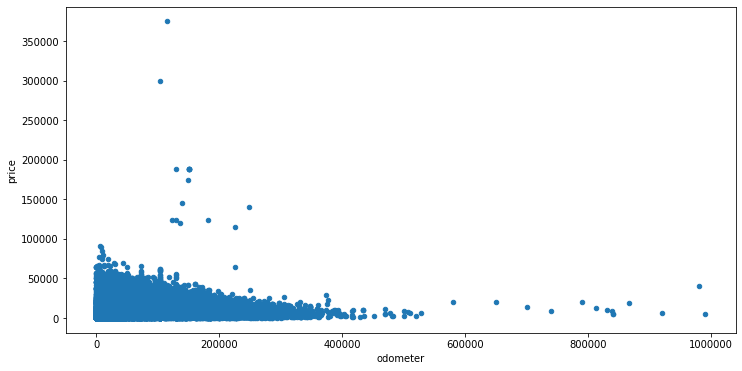

In [59]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].plot.scatter(x='odometer', y='price', figsize=(12,6)).ticklabel_format(style='plain', axis='x')

Da mesma forma que a idade, os veículos com menos km rodados tendem a ser mais caros.

In [60]:
dados['price'].corr(dados['odometer'])

-0.3935496715171274

Há uma correlação negativa (quanto menor os km rodados, maior o preço) e há uma correlação mais fraca comparado a idade/preço.

<AxesSubplot:xlabel='condition', ylabel='price'>

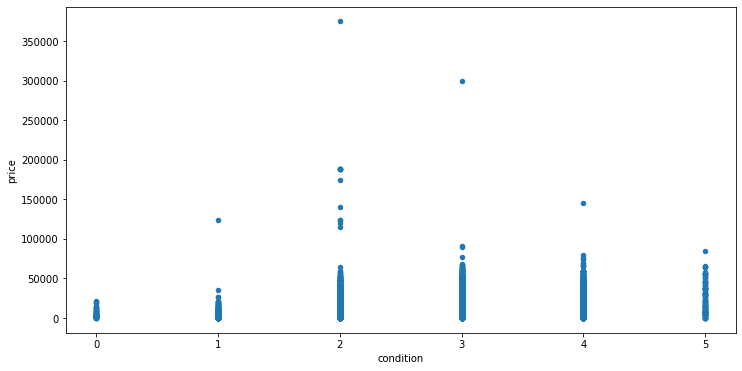

In [61]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].plot.scatter(x='condition', y='price', figsize=(12,6))

<AxesSubplot:title={'center':'price'}, xlabel='condition'>

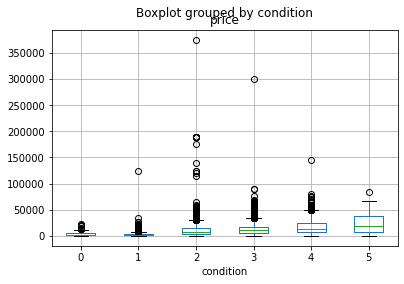

In [62]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].boxplot('price', by='condition', figsize=(12,6))

Veículos com melhores condições tendem a ser mais caros também.

In [63]:
dados['price'].corr(dados['condition'])

0.22151805102843367

Há uma correlação positiva (quanto melhor a condição, maior o preço) e é uma correlação fraca, não há um padrão certo, sendo que as condições 2, 3 e 4 possuem preços maiores que a condição 5.

<AxesSubplot:xlabel='transmission', ylabel='price'>

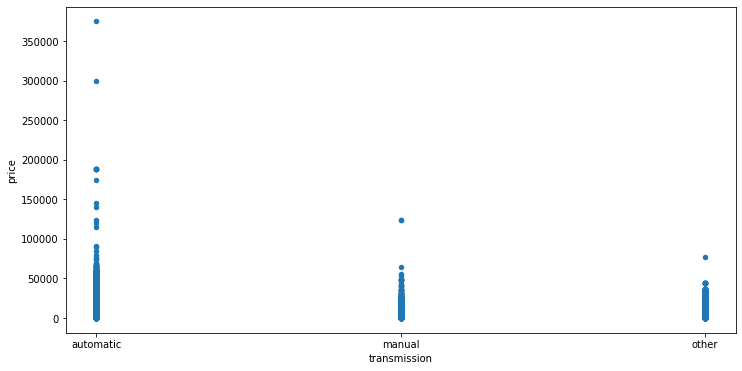

In [64]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].plot.scatter(x='transmission', y='price', figsize=(12,6))

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

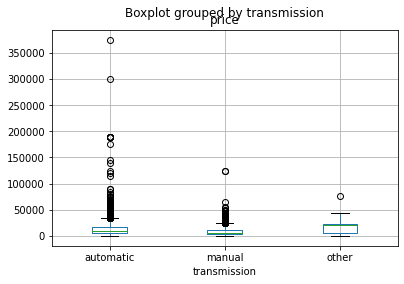

In [65]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].boxplot('price', by='transmission', figsize=(12,6))

Veículos automáticos tendem a ser mais caros que manuais e outros tipos de transmissão.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

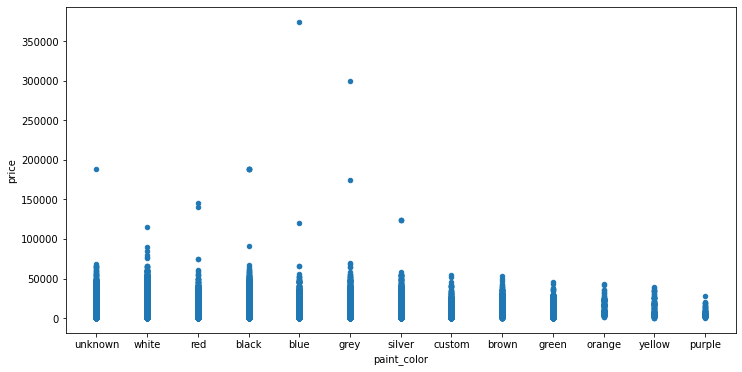

In [66]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].plot.scatter(x='paint_color', y='price', figsize=(12,6))

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

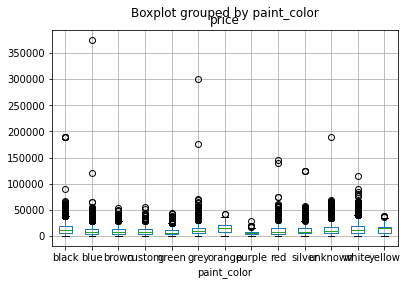

In [67]:
dados[dados['type'].isin(['SUV', 'truck', 'sedan', 'pickup'])].boxplot('price', by='paint_color', figsize=(12,6))

Veículos com cores mais clássicas (branco, vermelho, preto, cinza, prata) tendem a ser mais caros, porém a cor não é algo que influencia muito.

## Fatores de preço

Iniciei a análise pelo pré processamento dos dados, onde encontramos e tratamos valores ausentes e duplicados:
* Foram encontrados valores ausentes nas colunas 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd', que foram tratados com a média, mediana, dependendo se havia ou não valores atípicos significativos; ou com a moda, se eram valores categóricos ou se havia apenas um valor em toda a coluna (caso da coluna 'is_4wd').
* Não foi encontrado nenhum valor duplicado.
* Mudei o tipo de dados das colunas 'model_year' e 'condition' para inteiros, e a coluna 'date_posted' para o tipo datetime.

Depois, enriqueci os dados criando novas colunas que poderiam ajudar na análise: 
* Dia postado
* Dia da semana postado
* Mês postado
* Ano postado

A partir da nova coluna 'year_posted', pude calcular a idade dos veículos.\
Também criei a coluna média de km rodado por ano.\
Substitui os valores da coluna 'condition' por valores numéricos, que também facilitam a análise e visualização.

A partir disso, iniciei a análise ecploratória dos dados, visualizando histogramas de vários parâmetros diferentes, tanto com o conjunto de dados completo quanto os dados filtrados (sem valores atípicos), que foram determinados pelo cálculo de limite superior e inferior. Comparando esses histogramas percebemos que eles são semelhantes.

Depois, analisamos quais são os modelos mais populares, sendo eles: SUV, truck, sedan e pickup.

Analisando cada parâmetro anterior com o preço e analisando sua correlação vemos que as correlaçôes mais fortes que temos, colocando em um ranking de 3, os parâmetros que mais influenciam o preço dos veículos são idade (veículos mais novos tendem a ser mais caros), transmissão (veículos automátivos tendem a ser caros que demais transmissões) e por último o odômetro (veículos com menos quilômetros rodados tendem a ser mais caros).
